In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
data=pd.read_csv("IPLData.csv",encoding='unicode_escape')

In [79]:
data.head()
# Players Who have previously played IPL are capped
# many nan values are here

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
0,Shikhar Dhawan,Punjab,Indian,Batter,1,192.0,5783.0,34.63,126.60,4.0,16.5,8.25,12.0,NaN,NaN,NaN
1,Shreyas Iyer,Kolkata,Indian,Batter,1,87.0,2375.0,31.67,123.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Faf Du Plessis,Bangalore,Overseas,Batter,1,100.0,2935.0,34.94,131.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Manish Pandey,Lucknow,Indian,Batter,1,154.0,3560.0,30.69,121.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Shimron Hetmyer,Rajasthan,Overseas,Batter,1,31.0,517.0,25.85,151.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
data.describe

<bound method NDFrame.describe of          Player Name       Team Nationality Player_Type  Capped  \
0     Shikhar Dhawan     Punjab      Indian      Batter       1   
1      Shreyas Iyer     Kolkata      Indian      Batter       1   
2     Faf Du Plessis  Bangalore    Overseas      Batter       1   
3     Manish Pandey     Lucknow      Indian      Batter       1   
4    Shimron Hetmyer  Rajasthan    Overseas      Batter       1   
..               ...        ...         ...         ...     ...   
230     Ravi Bishnoi    Lucknow      Indian     Bowler        1   
231  Ruturaj Gaikwad    Chennai      Indian      Batter       1   
232    Sunil Narine     Kolkata    Overseas  Allrounder       1   
233  Kieron Pollard      Mumbai    Overseas  Allrounder       1   
234    Anrich Nortje      Delhi    Overseas     Bowler        1   

     Matches_Played    Runs  Average  Strike_Rate  Wickets  Bowling_average  \
0             192.0  5783.0    34.63       126.60      4.0            16.50   
1  

In [81]:
data.info

<bound method DataFrame.info of          Player Name       Team Nationality Player_Type  Capped  \
0     Shikhar Dhawan     Punjab      Indian      Batter       1   
1      Shreyas Iyer     Kolkata      Indian      Batter       1   
2     Faf Du Plessis  Bangalore    Overseas      Batter       1   
3     Manish Pandey     Lucknow      Indian      Batter       1   
4    Shimron Hetmyer  Rajasthan    Overseas      Batter       1   
..               ...        ...         ...         ...     ...   
230     Ravi Bishnoi    Lucknow      Indian     Bowler        1   
231  Ruturaj Gaikwad    Chennai      Indian      Batter       1   
232    Sunil Narine     Kolkata    Overseas  Allrounder       1   
233  Kieron Pollard      Mumbai    Overseas  Allrounder       1   
234    Anrich Nortje      Delhi    Overseas     Bowler        1   

     Matches_Played    Runs  Average  Strike_Rate  Wickets  Bowling_average  \
0             192.0  5783.0    34.63       126.60      4.0            16.50   
1    

In [82]:
data.shape

(235, 16)

In [83]:
data.isna().sum()

Player Name              0
Team                     0
Nationality              0
Player_Type              0
Capped                   0
Matches_Played          20
Runs                    70
Average                 74
Strike_Rate             72
Wickets                 95
Bowling_average        100
Economy                 92
Bowling_Strike_Rate    116
Catches                208
Run_outs               208
Stumps                 208
dtype: int64

# Classifying data based on roles

## BOWLERS

In [84]:
# Bowlers Data 
bowlers = data.loc[(data['Player_Type']=='Bowler ')]
# bowlers.head()
exp_bowlers = bowlers.loc[(bowlers['Capped']==1)]
exp_bowlers=exp_bowlers[['Player Name','Team','Nationality','Wickets','Bowling_Strike_Rate','Bowling_average','Economy','Matches_Played']]
exp_bowlers.head()

,Player Name,Team,Nationality,Wickets,Bowling_Strike_Rate,Bowling_average,Economy,Matches_Played
36,Kagiso Rabada,Punjab,Overseas,76.0,15.00,20.53,8.21,50.0
37,Trent Boult,Rajasthan,Overseas,76.0,18.64,26.09,8.40,62.0
38,Mohammad Shami,Gujarat,Indian,79.0,21.14,30.41,8.63,77.0
39,T Natarajan,Hyderabad,Indian,20.0,25.05,34.40,8.24,24.0
40,Deepak Chahar,Chennai,Indian,59.0,22.44,29.19,7.80,63.0


## BATSMEN

In [85]:
batters = data.loc[(data['Player_Type']=='Batter') ]
# batters.head()
# now classifying them based on capped or not
exp_batter = batters.loc[(batters['Capped']==1)]
exp_batter=exp_batter[['Player Name','Team','Nationality','Average','Runs','Strike_Rate','Matches_Played']]
exp_batter.head()
# new_batter = batters.loc[(batters['Capped']==0)]
# new_batter.head()

,Player Name,Team,Nationality,Average,Runs,Strike_Rate,Matches_Played
0,Shikhar Dhawan,Punjab,Indian,34.63,5783.0,126.60,192.0
1,Shreyas Iyer,Kolkata,Indian,31.67,2375.0,123.96,87.0
2,Faf Du Plessis,Bangalore,Overseas,34.94,2935.0,131.09,100.0
3,Manish Pandey,Lucknow,Indian,30.69,3560.0,121.83,154.0
4,Shimron Hetmyer,Rajasthan,Overseas,25.85,517.0,151.17,31.0


## WICKET-KEEPERS

In [86]:
# Wicket Keepers Data
keepers = data.loc[(data['Player_Type'] == 'Keeper') ]
keepers.head()
# now classifying them based on capped or not
exp_keepers = keepers.loc[(keepers['Capped']==1)]
exp_keepers=exp_keepers[['Player Name','Team','Nationality','Catches','Stumps','Run_outs','Matches_Played']]
exp_keepers.head()
# new_keepers= keepers.loc[(keepers['Capped']==0)]
# new_keepers.head() 

,Player Name,Team,Nationality,Catches,Stumps,Run_outs,Matches_Played
105,Quinton De Kock,Lucknow,Overseas,53.0,14.0,0.0,77.0
106,Ambati Rayudu,Chennai,Indian,58.0,2.0,12.0,175.0
107,Ishan Kishan,Mumbai,Indian,19.0,2.0,1.0,61.0
108,Jonny Bairstow,Punjab,Overseas,18.0,4.0,1.0,28.0
109,Dinesh Karthik,Bangalore,Indian,123.0,32.0,14.0,213.0


## ALL-ROUNDERS

In [87]:
# Allrounders Data
allrounder=data.loc[(data['Player_Type']=='Allrounder')]
exp_allrounders=allrounder[['Player Name','Team','Nationality','Matches_Played','Runs','Average','Strike_Rate','Wickets','Bowling_average','Economy','Bowling_Strike_Rate']]
allrounder.head()

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
127,Ravichandran Ashwin,Rajasthan,Indian,Allrounder,1,167.0,456.0,11.12,109.88,145.0,27.80,6.91,24.12,NaN,NaN,NaN
128,Pat Cummins,Kolkata,Overseas,Allrounder,1,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95,NaN,NaN,NaN
129,Dwayne Bravo,Chennai,Overseas,Allrounder,1,151.0,1537.0,22.94,130.25,167.0,24.32,8.36,17.44,NaN,NaN,NaN
130,Nitish Rana,Kolkata,Indian,Allrounder,1,77.0,1820.0,28.00,132.46,7.0,22.00,8.03,16.43,NaN,NaN,NaN
131,Jason Holder,Lucknow,Overseas,Allrounder,1,26.0,189.0,14.54,121.15,35.0,22.46,8.20,16.43,NaN,NaN,NaN


#### Cleaning all data by putting NaN values to 0 so that we can further procss the data.

In [88]:

exp_batter=exp_batter.fillna(0)
# exp_batter.isna().sum()
exp_bowlers=exp_bowlers.fillna(0)
exp_keepers=exp_keepers.fillna(0)
exp_allrounders=exp_allrounders.fillna(0)
exp_batter.head()


,Player Name,Team,Nationality,Average,Runs,Strike_Rate,Matches_Played
0,Shikhar Dhawan,Punjab,Indian,34.63,5783.0,126.60,192.0
1,Shreyas Iyer,Kolkata,Indian,31.67,2375.0,123.96,87.0
2,Faf Du Plessis,Bangalore,Overseas,34.94,2935.0,131.09,100.0
3,Manish Pandey,Lucknow,Indian,30.69,3560.0,121.83,154.0
4,Shimron Hetmyer,Rajasthan,Overseas,25.85,517.0,151.17,31.0


### Analysis Starts after Cleaning Data by sorting after each values because order of sorting matters and it is heirarchial.

## Batsmen

In [89]:

top_batter=exp_batter.sort_values(by=['Average','Runs','Strike_Rate','Matches_Played'],ascending=False)
top_batter.head(100)


,Player Name,Team,Nationality,Average,Runs,Strike_Rate,Matches_Played
212,KL Rahul,Lucknow,Indian,47.43,3273.0,136.38,94.0
231,Ruturaj Gaikwad,Chennai,Indian,46.61,839.0,132.13,22.0
19,David Warner,Delhi,Overseas,41.60,5449.0,139.97,150.0
207,Kane Williamson,Hyderabad,Overseas,40.11,1885.0,131.27,63.0
208,Virat Kohli,Bangalore,Indian,37.40,6283.0,129.95,207.0
2,Faf Du Plessis,Bangalore,Overseas,34.94,2935.0,131.09,100.0
0,Shikhar Dhawan,Punjab,Indian,34.63,5783.0,126.60,192.0
26,David Miller,Gujarat,Overseas,32.90,1974.0,136.51,89.0
1,Shreyas Iyer,Kolkata,Indian,31.67,2375.0,123.96,87.0
7,Devdutt Padikkal,Rajasthan,Indian,31.57,884.0,125.05,29.0


## Bowlers

#### First parameter will be most no of wickets taken.
Wickets should be in descending order.
##### Bowling strike rate is the average number of deliveries taken per dismissal or catch.
Bowling strike rate should be in ascending order.
##### Bowling average is the number of runs they have conceded per wicket taken
Bowling avearge should be in ascending order.
##### Bowlers economy is the average number of runs they have conceded per over bowled.
Bowling economy should be in ascending order
##### Matches Played
Matches played should be in descending order.

In [90]:
top_bowlers=exp_bowlers.sort_values(['Wickets','Bowling_Strike_Rate','Bowling_average','Economy','Matches_Played'],ascending=[0,1,1,1,0])
top_bowlers.head()

,Player Name,Team,Nationality,Wickets,Bowling_Strike_Rate,Bowling_average,Economy,Matches_Played
45,Bhuvneshwar Kumar,Hyderabad,Indian,142.0,20.77,25.27,7.30,132.0
50,Yuzvendra Chahal,Rajasthan,Indian,139.0,17.61,22.28,7.59,114.0
215,Jasprit Bumrah,Mumbai,Indian,130.0,18.63,23.05,7.42,106.0
102,Umesh Yadav,Kolkata,Indian,119.0,21.19,30.08,8.51,121.0
68,Sandeep Sharma,Punjab,Indian,112.0,19.62,25.44,7.78,99.0


## All-Rounders

In [91]:
top_allrounders=exp_allrounders.sort_values(['Strike_Rate','Average','Runs','Matches_Played','Wickets','Economy'],ascending=[0,0,0,0,0,1])
top_allrounders.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
151,Odean Smith,Punjab,Overseas,8.0,49.0,12.25,163.33,7.0,33.86,10.77,18.86
167,Dwaine Pretorius,Chennai,Overseas,22.0,170.0,24.29,161.90,23.0,19.48,7.77,15.04
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83


## Keepers

In [92]:
top_keepers=exp_keepers.sort_values(['Catches','Stumps','Run_outs','Matches_Played'],ascending=[0,0,0,0])
top_keepers.head()

,Player Name,Team,Nationality,Catches,Stumps,Run_outs,Matches_Played
213,MS Dhoni,Chennai,Indian,126.0,39.0,21.0,220.0
109,Dinesh Karthik,Bangalore,Indian,123.0,32.0,14.0,213.0
118,Wridhhiman Saha,Gujarat,Indian,69.0,20.0,3.0,133.0
209,Sanju Samson,Rajasthan,Indian,59.0,10.0,8.0,121.0
106,Ambati Rayudu,Chennai,Indian,58.0,2.0,12.0,175.0


# Visualisation for more easier analysis.

## Standard Cricket team has 
    # 5 Batsman 
    # 1 All-Rounder 
    # 1 Wicket-Keeper 
    # 4 Bowlers


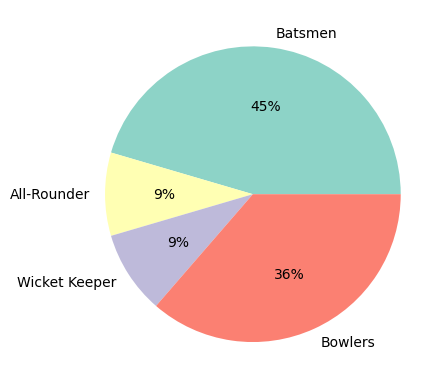

In [93]:
# Cricket Team Distribution
data = [5, 1, 1, 4]
keys = ['Batsmen', 'All-Rounder', 'Wicket Keeper', 'Bowlers']
  
# define Seaborn color palette to use
palette_color = sns.color_palette('Set3')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

### Plotting top 10 batsmen with Strikerate

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


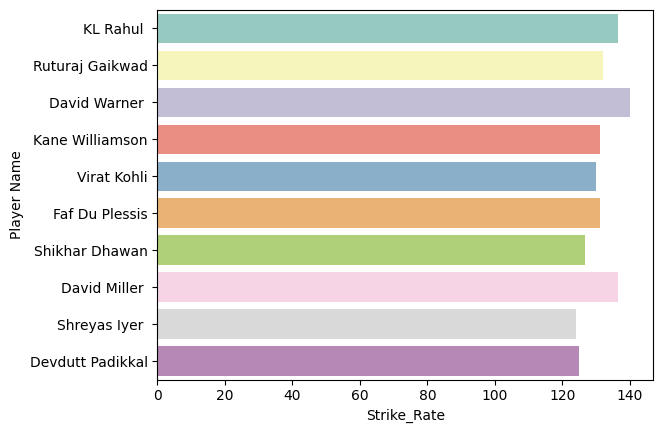

In [94]:
batsmen_top10=sns.barplot(data=top_batter[0:10],y="Player Name",x="Strike_Rate",palette="Set3")

### Plotting top 10 bowlers with Wickets

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


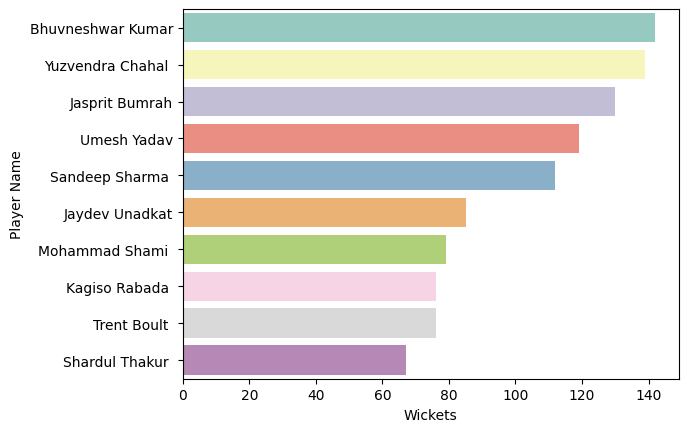

In [95]:
#Plotting top 10 bowlers with Wickets
bowlers_top10=sns.barplot(data=top_bowlers[0:10],y="Player Name",x="Wickets",palette="Set3")

### Plotting top 10 WicketKeepers with Strikerate

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


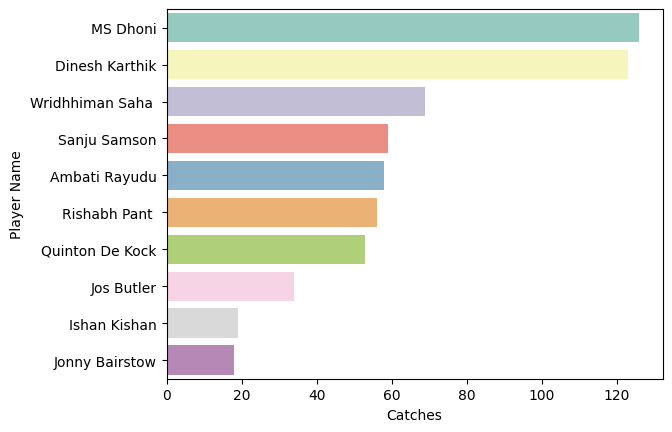

In [96]:
#Plotting top 10 Wicket-Keepers with Catches Taken.
Wicketkeepers_top10=sns.barplot(data=top_keepers[0:10],y="Player Name",x="Catches",palette="Set3")

### Plotting top 10 AllRounders with Strikerate

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


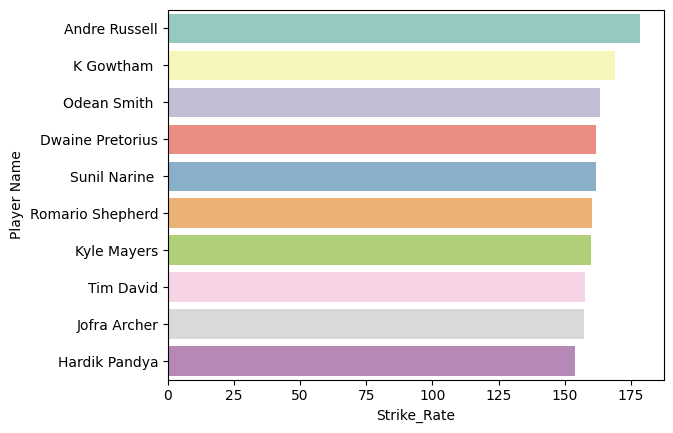

In [97]:
#Plotting top 10 All-Rounders with 
Allrounders_top10=sns.barplot(data=top_allrounders[0:10],y="Player Name",x="Strike_Rate",palette="Set3")

# Best Batsmen
#### 1.KL Rahul
#### 2.Ruturaj Gaikwad
#### 3.David Warner
#### 4.Kane Williamson
#### 5.Virat Kohli


# Best Bowlers
#### 1.Bhuvneshwar Kumar
#### 2.Yuzvendra Chahal
#### 3.Jasprit Bumrah
#### 4.Umesh Yadav
#### 5.Sandeep Sharma


# Best All-Rounders
#### 1.Andre Russell
#### 2.K Gowtham
#### 3.Odean Smith
#### 4.Dwaine Pretorius
#### 5.Sunil Narine


# Best Keepers
#### 1.MS Dhoni
#### 2.Dinesh Karthik
#### 3.Wridhhiman Saha
#### 4.Sanju Samson
#### 5.Ambati Rayudu


#### csv-file link:https://drive.google.com/drive/folders/1KpkWKugIootlhqPW_KCMzXrcyU6p217B
